- We expect the residual errors to be random, because it means that the model has captured all of the structure and the only error left is the random fluctuations in the time series that cannot be modeled. 
- if not random, further improve the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

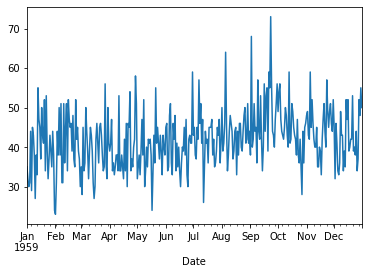

In [2]:
df = pd.read_csv("data/daily-total-female-births.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
df.plot()
plt.show()

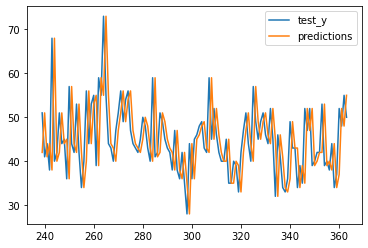

In [3]:
values = pd.DataFrame(df.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
X = dataframe.values
train_size = int(len(X)*0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

plt.plot([None for i in train_y] + [x for x in test_y], label='test_y')
plt.plot([None for i in train_y] + [x for x in predictions], label='predictions')
plt.legend()
plt.show()

In [4]:
residuals = pd.DataFrame([test_y[i]-predictions[i] for i in range(len(predictions))])
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


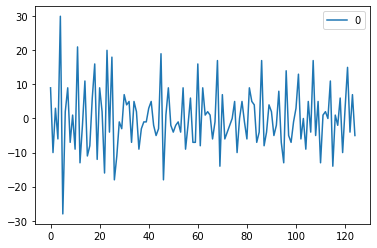

In [5]:
# line plot
residuals.plot()
plt.show()

In [6]:
# summary statistics
residuals.describe()

,0
count,125.000000
mean,0.064000
std,9.187776
min,-28.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,30.000000


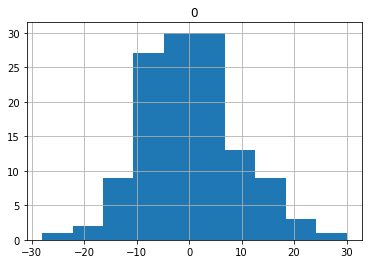

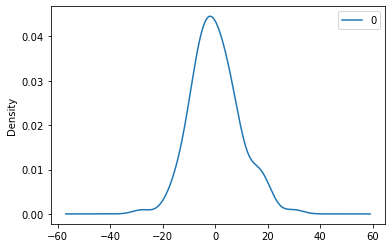

In [7]:
# histogram and density plots
residuals.hist()
plt.show()
residuals.plot(kind='kde')
plt.show()

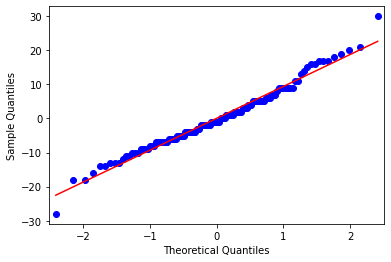

In [8]:
 # residual Q-Q plot (quantile plot)
from statsmodels.graphics.gofplots import qqplot
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()

- compares two distributions and can be used to see how similar or different they happen to be
- The values are ordered and compared to an idealized Gaussian distribution
- The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot

[]

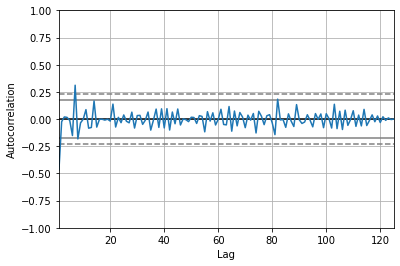

In [9]:
# residuals autocorrelation plot
from pandas.plotting import autocorrelation_plot
residuals = pd.DataFrame([test_y[i]-predictions[i] for i in range(len(predictions))])
autocorrelation_plot(residuals)
plt.plot()

- no correlation